In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from skimage.transform import rescale
from skimage.color import rgb2hsv, rgb2gray
from skimage.filters import try_all_threshold
from skimage.filters import threshold_minimum, threshold_otsu, threshold_isodata
from os import listdir

(240, 320, 3)


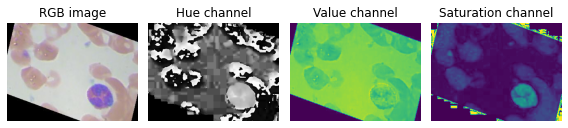

In [2]:
rgb_img = imread('C:/Users/DELL/Documents/GitHub/21Cs460_group12/Code and Data/WBC_data_kaggle/main_dataset/test/EOSINOPHIL/_0_2107.jpeg')
print(np.shape(rgb_img))
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
sat_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='gray')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')
ax3.imshow(sat_img)
ax3.set_title("Saturation channel")
ax3.axis('off')

fig.tight_layout()

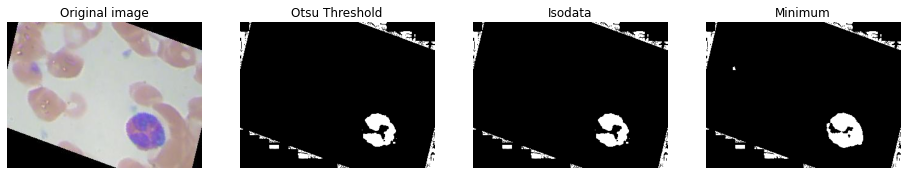

In [3]:
thresh1 = threshold_otsu(sat_img)
binary1 = sat_img > thresh1

thresh2 = threshold_isodata(sat_img)
binary2 = sat_img > thresh2

thresh3 = threshold_minimum(sat_img)
binary3 = sat_img > thresh3

fig, axes = plt.subplots(ncols=4, figsize=(16, 3))
ax = axes.ravel()

ax[0].imshow(rgb_img)
ax[0].set_title('Original image')

ax[1].imshow(binary1, cmap=plt.cm.gray)
ax[1].set_title('Otsu Threshold')

ax[2].imshow(binary2, cmap=plt.cm.gray)
ax[2].set_title('Isodata')

ax[3].imshow(binary3, cmap=plt.cm.gray)
ax[3].set_title('Minimum')

for a in ax:
    a.axis('off')

plt.show()

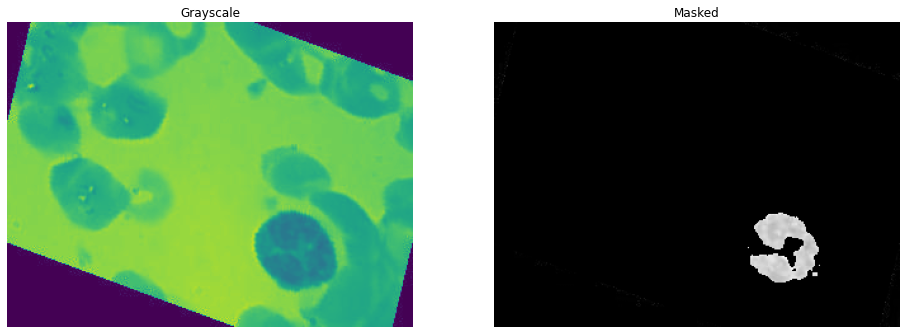

In [4]:
gimg = rgb2gray(rgb_img)
masked = binary1*gimg
# plt.imshow(masked, cmap = 'gray')

fig, axes = plt.subplots(ncols=2, figsize=(16, 12))
ax = axes.ravel()

ax[0].imshow(gimg)
ax[0].set_title('Grayscale')

ax[1].imshow(masked, cmap=plt.cm.gray)
ax[1].set_title('Masked')

for a in ax:
    a.axis('off')

plt.show()

In [5]:
def nucleusSegmentation(rgb_img):
    
    # RGB to HSV conversion
    hsv_img = rgb2hsv(rgb_img)
    sat_img = hsv_img[:, :, 1]
    
    # Thresholding
    thresh1 = threshold_otsu(sat_img)
    binary1 = sat_img > thresh1
    
    # Converting to grayscale.
    gimg = rgb2gray(rgb_img)
    
    # Masking grayscale image using the binary image
    masked = binary1*gimg
    
    return(masked)

In [9]:
# plt.imsave('Original.jpeg',rgb_img)
# plt.imsave('Grayscale.jpeg',gimg, cmap = 'gray')
# plt.imsave('Saturated.jpeg',sat_img, cmap = 'gray')
# plt.imsave('Otsu Threshold.jpeg',binary1, cmap = 'gray')
# plt.imsave('Final Product.jpeg',masked, cmap = 'gray')

In [ ]:
# value_threshold = 0.79
# binary_img = value_img > value_threshold

# fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

# ax0.hist(value_img.ravel(), 512)
# ax0.set_title("Histogram of the Hue channel with threshold")
# ax0.axvline(x=value_threshold, color='r', linestyle='dashed', linewidth=2)
# ax0.set_xbound(0.1, 1)
# ax1.imshow(binary_img)
# ax1.set_title("value-thresholded image")
# ax1.axis('off')

# fig.tight_layout()

In [ ]:
# fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

# sat_threshold = 0.8
# binary_img = (value_img > value_threshold) | (sat_img > sat_threshold)

# ax0.hist(sat_img.ravel(), 512)
# ax0.set_title("Histogram of the Sat channel with threshold")
# ax0.axvline(x=sat_threshold, color='r', linestyle='dashed', linewidth=2)
# ax0.set_xbound(0.4, 1)
# ax1.imshow(binary_img)
# ax1.set_title("Hue and Sat thresholded image")
# ax1.axis('off')

# fig.tight_layout()
# plt.show()

In [ ]:
# fig, ax = try_all_threshold(sat_img, figsize=(10, 8), verbose=False)
# plt.show()